In [1]:
import sklearn
import numpy as np

## Data Standardization

In [2]:
pizza_data = np.array([[2100,   10,  800],
       [2500,   11,  850],
       [1800,   10,  760],
       [2000,   12,  800],
       [2300,   11,  810]]
)

In [3]:
from sklearn.preprocessing import scale

In [4]:
Pizza_mean  = pizza_data.mean(axis = 0)
print('{}\n'.format(Pizza_mean))

[2140.    10.8  804. ]



In [5]:
Pizza_sd  = pizza_data.std(axis = 0)
print('{}\n'.format(Pizza_sd))

[241.66091947   0.74833148  28.70540019]



In [6]:
col_standardization = scale(pizza_data)
print('{}\n'.format(col_standardization))

[[-0.16552118 -1.06904497 -0.1393466 ]
 [ 1.4896906   0.26726124  1.60248593]
 [-1.40693001 -1.06904497 -1.53281263]
 [-0.57932412  1.60356745 -0.1393466 ]
 [ 0.66208471  0.26726124  0.2090199 ]]



In [7]:
col_means = col_standardization.mean(axis=0).round(decimals=3)
print('{}\n'.format(repr(col_means)))

array([ 0., -0.,  0.])



In [8]:

# Column standard deviations
col_stds = col_standardization.std(axis=0)
print('{}\n'.format(repr(col_stds)))

array([1., 1., 1.])



In [9]:
def standardize_data(data):
  scaled_data = scale(data)
  return scaled_data

## Range Compression (Min Max Scalar)

In [10]:
data = np.array([[ 1.2,  3.2],
       [-0.3, -1.2],
       [ 6.5, 10.1],
       [ 2.2, -8.4]])
# predefined data
print('{}\n'.format(repr(data)))


array([[ 1.2,  3.2],
       [-0.3, -1.2],
       [ 6.5, 10.1],
       [ 2.2, -8.4]])



In [11]:

from sklearn.preprocessing import MinMaxScaler
default_scaler = MinMaxScaler() # the default range is [0,1]
transformed = default_scaler.fit_transform(data)
print('{}\n'.format(repr(transformed)))


array([[0.22058824, 0.62702703],
       [0.        , 0.38918919],
       [1.        , 1.        ],
       [0.36764706, 0.        ]])



In [12]:

custom_scaler = MinMaxScaler(feature_range=(-2, 3))
transformed = custom_scaler.fit_transform(data)
print('{}\n'.format(repr(transformed)))

array([[-0.89705882,  1.13513514],
       [-2.        , -0.05405405],
       [ 3.        ,  3.        ],
       [-0.16176471, -2.        ]])



In [13]:
new_data= np.array([[ 1.2, -0.5],
       [ 5.3,  2.3],
       [-3.3,  4.1]])

In [14]:
print('{}\n'.format(repr(new_data)))

array([[ 1.2, -0.5],
       [ 5.3,  2.3],
       [-3.3,  4.1]])



In [15]:
default_scaler = MinMaxScaler() # the default range is [0,1]
transformed = default_scaler.fit_transform(new_data)
print('{}\n'.format(repr(transformed)))

array([[0.52325581, 0.        ],
       [1.        , 0.60869565],
       [0.        , 1.        ]])



In [16]:
default_scaler = MinMaxScaler()  # new instance
default_scaler.fit(data)  # different data value fit
transformed = default_scaler.transform(new_data)
print('{}\n'.format(repr(transformed)))

array([[ 0.22058824,  0.42702703],
       [ 0.82352941,  0.57837838],
       [-0.44117647,  0.67567568]])



In [17]:
data = np.array([[ 1.2,  2.3],
       [ 2.1,  4.2],
       [-1.9,  3.1],
       [-2.5,  2.5],
       [ 0.8,  3. ],
       [ 6.3,  2.1],
       [-1.5,  2.7],
       [ 1.4,  2.9],
       [ 1.8,  3.2]])# predefined data
print('{}\n'.format(repr(data)))


array([[ 1.2,  2.3],
       [ 2.1,  4.2],
       [-1.9,  3.1],
       [-2.5,  2.5],
       [ 0.8,  3. ],
       [ 6.3,  2.1],
       [-1.5,  2.7],
       [ 1.4,  2.9],
       [ 1.8,  3.2]])



In [18]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
transformed = robust_scaler.fit_transform(data)
print('{}\n'.format(repr(transformed)))

array([[ 0.        , -1.        ],
       [ 0.27272727,  2.16666667],
       [-0.93939394,  0.33333333],
       [-1.12121212, -0.66666667],
       [-0.12121212,  0.16666667],
       [ 1.54545455, -1.33333333],
       [-0.81818182, -0.33333333],
       [ 0.06060606,  0.        ],
       [ 0.18181818,  0.5       ]])



## Data Imputation

In [19]:
data = np.array(([[ 1.,  2., np.nan,  2.],
       [ 5., np.nan,  1.,  2.],
       [ 4., np.nan,  3., np.nan],
       [ 5.,  6.,  8.,  1.],
       [np.nan,  7., np.nan,  0.]]))
print('{}\n'.format(repr(data)))


array([[ 1.,  2., nan,  2.],
       [ 5., nan,  1.,  2.],
       [ 4., nan,  3., nan],
       [ 5.,  6.,  8.,  1.],
       [nan,  7., nan,  0.]])



In [20]:
# Default is MEAN 
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer()
transformed = imp_mean.fit_transform(data)
print('{}\n'.format(repr(transformed)))

array([[1.  , 2.  , 4.  , 2.  ],
       [5.  , 5.  , 1.  , 2.  ],
       [4.  , 5.  , 3.  , 1.25],
       [5.  , 6.  , 8.  , 1.  ],
       [3.75, 7.  , 4.  , 0.  ]])



In [21]:
imp_median = SimpleImputer(strategy='median')
transformed = imp_median.fit_transform(data)
print('{}\n'.format(repr(transformed)))

array([[1. , 2. , 3. , 2. ],
       [5. , 6. , 1. , 2. ],
       [4. , 6. , 3. , 1.5],
       [5. , 6. , 8. , 1. ],
       [4.5, 7. , 3. , 0. ]])



In [22]:
imp_frequent = SimpleImputer(strategy='most_frequent')
transformed = imp_frequent.fit_transform(data)
print('{}\n'.format(repr(transformed)))

array([[1., 2., 1., 2.],
       [5., 2., 1., 2.],
       [4., 2., 3., 2.],
       [5., 6., 8., 1.],
       [5., 7., 1., 0.]])



In [23]:
#fill with a specified Value
imp_constant = SimpleImputer(strategy='constant',
                             fill_value=-1)
transformed = imp_constant.fit_transform(data)
print('{}\n'.format(repr(transformed)))

array([[ 1.,  2., -1.,  2.],
       [ 5., -1.,  1.,  2.],
       [ 4., -1.,  3., -1.],
       [ 5.,  6.,  8.,  1.],
       [-1.,  7., -1.,  0.]])



In [24]:
data = np.array([[ 1.5,  3. ,  9. , -0.5,  1. ],
       [ 2.2,  4.3,  3.5,  0.6,  2.7],
       [ 3. ,  6.1,  1.1,  1.2,  4.2],
       [ 8. , 16. ,  7.7, -1. ,  7.1]])
print('{}\n'.format(repr(data)))


array([[ 1.5,  3. ,  9. , -0.5,  1. ],
       [ 2.2,  4.3,  3.5,  0.6,  2.7],
       [ 3. ,  6.1,  1.1,  1.2,  4.2],
       [ 8. , 16. ,  7.7, -1. ,  7.1]])



In [25]:

from sklearn.decomposition import PCA
pca_obj = PCA() # The value of n_component will be 4. As m is 5 and default is always m-1
pc = pca_obj.fit_transform(data).round(3)
print('{}\n'.format(repr(pc)))


array([[-4.8600e+00,  4.6300e+00, -4.7000e-02,  0.0000e+00],
       [-3.7990e+00, -1.3180e+00,  1.2700e-01,  0.0000e+00],
       [-1.8630e+00, -4.2260e+00, -8.9000e-02,  0.0000e+00],
       [ 1.0522e+01,  9.1400e-01,  9.0000e-03,  0.0000e+00]])



In [26]:

pca_obj = PCA(n_components=3)
pc = pca_obj.fit_transform(data).round(1)
print('{}\n'.format(repr(pc)))


array([[-4.9,  4.6, -0. ],
       [-3.8, -1.3,  0.1],
       [-1.9, -4.2, -0.1],
       [10.5,  0.9,  0. ]])



In [27]:

pca_obj = PCA(n_components=2)
pc = pca_obj.fit_transform(data).round(2)
print('{}\n'.format(repr(pc)))

array([[-4.86,  4.63],
       [-3.8 , -1.32],
       [-1.86, -4.23],
       [10.52,  0.91]])



In [29]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
print('{}\n'.format(repr(bc.data)))
print('Data shape: {}\n'.format(bc.data.shape))


array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

Data shape: (569, 30)



In [30]:

# Class labels
print('{}\n'.format(repr(bc.target)))
print('Labels shape: {}\n'.format(bc.target.shape))


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [31]:

# Label names
print('{}\n'.format(list(bc.target_names)))


['malignant', 'benign']



In [32]:

malignant = bc.data[bc.target == 0]
print('Malignant shape: {}\n'.format(malignant.shape))


Malignant shape: (212, 30)



In [33]:

benign = bc.data[bc.target == 1]
print('Benign shape: {}\n'.format(benign.shape))

Benign shape: (357, 30)



In [34]:
def get_label_info(component_data, labels,
                   class_label, label_names):
                       label_name = label_names[class_label]
                       label_data = component_data[labels == class_label]
                       return label_name, label_data

In [35]:
def separate_data(component_data, labels,
                  label_names):
    separated_data = []
    for class_label in range(len(label_names)):
        separated_data.append(get_label_info(component_data,labels,class_label,label_names))
    return separated_data


In [36]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
bc = load_breast_cancer()
pca_obj = PCA(n_components=2)
component_data = pca_obj.fit_transform(bc.data)
labels = bc.target
label_names = bc.target_names
# Using the completed separate_data function
separated_data = separate_data(component_data,
                               labels, label_names)


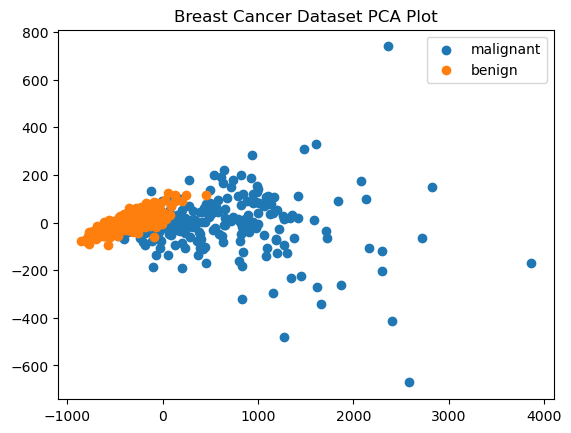

In [37]:

# Plotting the data
import matplotlib.pyplot as plt
for label_name, label_data in separated_data:
  col1 = label_data[:, 0]  # 1st column (1st pr. comp.)
  col2 = label_data[:, 1]  # 2nd column (2nd pr. comp.)
  plt.scatter(col1, col2, label=label_name) # scatterplot
plt.legend()  # adds legend to plot
plt.title('Breast Cancer Dataset PCA Plot')
plt.show()